In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import log
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [52]:
df1 = pd.read_excel("TCP23_data.xlsx")

In [53]:
df1 = df1.iloc[6:23,0:7]

In [54]:
df1

,E-bike Sales Data Across the World,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
6,2006,--,98,--,--,--,--
7,2007,--,173,--,--,--,--
8,2008,--,279,15,--,--,--
9,2009,--,422,24,--,--,--
10,2010,--,588,38,--,--,--
11,2011,--,716,37,--,--,409
12,2012,--,854,46,34500,--,392
13,2013,--,907,57,36000,--,446
14,2014,--,1139,78,34400,--,474
15,2015,--,1364,102,31800,--,468


In [55]:
df1

,E-bike Sales Data Across the World,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
6,2006,--,98,--,--,--,--
7,2007,--,173,--,--,--,--
8,2008,--,279,15,--,--,--
9,2009,--,422,24,--,--,--
10,2010,--,588,38,--,--,--
11,2011,--,716,37,--,--,409
12,2012,--,854,46,34500,--,392
13,2013,--,907,57,36000,--,446
14,2014,--,1139,78,34400,--,474
15,2015,--,1364,102,31800,--,468


In [56]:
df1 = df1.rename(columns = {'E-bike Sales Data Across the World': "Year", "Unnamed: 1"
                            : "United States (1000s)",
                            "Unnamed: 2" : "Europe (1000s)", 
                            "Unnamed: 3": "France (1000s)", 
                            "Unnamed: 4": "China (1000s)",
                            "Unnamed: 5": "India (1000s)",
                             "Unnamed: 6": "Japan (1000s)"})

In [57]:
df1

,Year,United States (1000s),Europe (1000s),Frances (1000s),China (1000s),India (1000s),Japan (1000s)
6,2006,--,98,--,--,--,--
7,2007,--,173,--,--,--,--
8,2008,--,279,15,--,--,--
9,2009,--,422,24,--,--,--
10,2010,--,588,38,--,--,--
11,2011,--,716,37,--,--,409
12,2012,--,854,46,34500,--,392
13,2013,--,907,57,36000,--,446
14,2014,--,1139,78,34400,--,474
15,2015,--,1364,102,31800,--,468


In [75]:
df1 = df1.replace("--", value = np.nan)

In [76]:
dfUS = df1[["Year", "United States (1000s)"]]

In [82]:
dfUS = dfUS.dropna(axis = 0)

In [83]:
X = dfUS[['Year']]

In [84]:
Y_US = dfUS[["United States (1000s)"]].drop("20", axis = 0)

In [85]:
linear = LinearRegression()

In [86]:
linear.fit(X, Y_US)

LinearRegression()

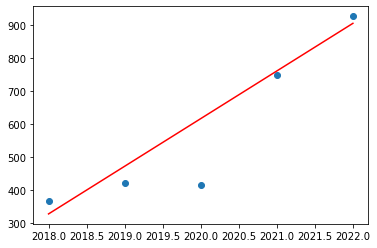

In [111]:
y_pred = linear.predict(X)
plt.plot(X, y_pred, color = "red")
plt.scatter(X, Y_US)
plt.show()

In [96]:
r_squared = linear.score(X, Y_US)
r_squared

0.8486843923606313

ValueError: x and y must be the same size

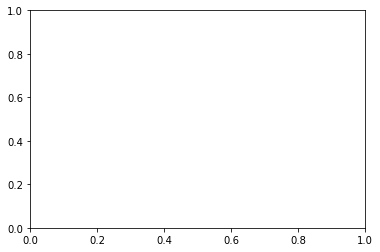

In [120]:
X_US2 = dfUS[["Year"]].drop(20, axis = 0)


In [121]:
Y_US2 = dfUS[["United States (1000s)"]].drop(20, axis = 0)

In [106]:
Y_US2

,United States (1000s)
18,369.0
19,423.0
21,750.0
22,928.0


In [108]:
linear.fit(X_US2, Y_US2)

LinearRegression()

In [110]:
r_squared = linear.score(X_US2, Y_US2)
r_squared

0.9777732511039621

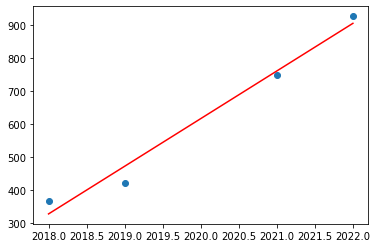

In [125]:
y_pred = linear.predict(X_US2)
plt.plot(X_US2, y_pred, color = "red")
plt.scatter(X_US2, Y_US2)
plt.show()

In [139]:
dfEurope = df1[["Year", "Europe (1000s)"]]
dfEurope = dfEurope.dropna(axis = 0)

In [141]:
dfEurope

,Year,Europe (1000s)
6,2006,98.0
7,2007,173.0
8,2008,279.0
9,2009,422.0
10,2010,588.0
11,2011,716.0
12,2012,854.0
13,2013,907.0
14,2014,1139.0
15,2015,1364.0


In [143]:
X_Europe = dfEurope[['Year']]

In [144]:
Y_Europe = dfEurope[["Europe (1000s)"]]

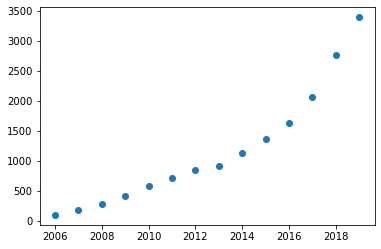

In [148]:
plt.scatter(X_Europe, Y_Europe)

In [151]:
linear.fit(X_Europe, np.log(Y_Europe))

LinearRegression()

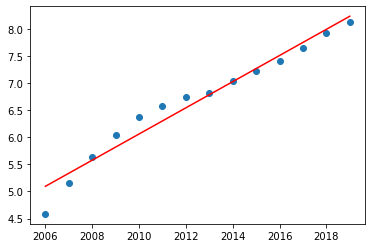

In [156]:
Y_Europe_pred = linear.predict(X_Europe)
plt.plot(X_Europe, Y_Europe_pred, color = "red")
plt.scatter(X_Europe, np.log(Y_Europe))
plt.show()

In [161]:
r_squared = linear.score(X_Europe, np.log(Y_Europe))
print("r = " + str(r_squared))
print("m = " + str(linear.coef_))
print("b = " + str(linear.intercept_))

r = 0.9562152421205669
m = [[0.24130109]]
b = [-478.95593947]


In [175]:
dfChina = df1[["Year", "China (1000s)"]].dropna()
X_China = dfChina[['Year']]
y_China = dfChina[['China (1000s)']]

print(dfChina)

    Year  China (1000s)
12  2012        34500.0
13  2013        36000.0
14  2014        34400.0
15  2015        31800.0
16  2016        31400.0
17  2017        30500.0
18  2018        32200.0
19  2019        36800.0
20  2020        47600.0
21  2021        41000.0


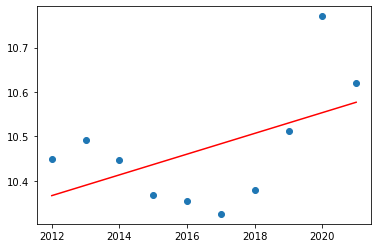

In [174]:
linear.fit(X_China, log(y_China))
y_China_pred = linear.predict(X_China)
plt.plot(X_China, y_China_pred, color = "red")
plt.scatter(X_China, np.log(y_China))
plt.show()